In [1]:
import pandas as pd

# 1. Import data
data = pd.read_csv('./data/vehicles.csv')

In [2]:
# 2. Clean data
year = 2016
filtered = data[data['Year']==year] #filter by year

In [3]:
# 3. Analuyze data
grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
results = grouped.sort_values('Combined MPG', ascending=False).head(5)
results ## Get top 5 brands, by average MPG

,Make,Combined MPG
42,smart,35.500000
27,Mazda,30.625000
37,Scion,30.000000
15,Honda,29.310345
25,MINI,28.176471


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Visualize data
title = 'Top 10 Manufacturers by Fuel Efficiency ' + str(year)

fig, ax = plt.subplots(figsize=(15,8))
barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
plt.title(title + "\n", fontsize=16)
barchart.get_figure()

<Figure size 1500x800 with 1 Axes>

In [5]:
# 5. Export the data
fig = barchart.get_figure()
fig.savefig(title + '.png')

Enter the year: 2012


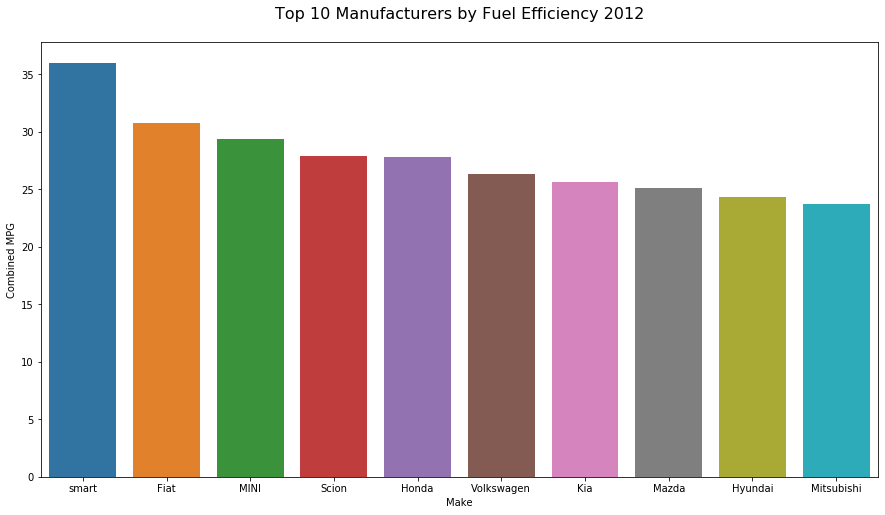

In [6]:
# How to automate the pipeline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

year = int(input('Enter the year: '))
title = 'Top 10 Manufacturers by Fuel Efficiency ' + str(year)

def acquire():
    data = pd.read_csv('./data/vehicles.csv')
    return data

def wrangle(df):
    filtered = data[data['Year']==year]
    return filtered

def analyze(df):
    grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
    results = grouped.sort_values('Combined MPG', ascending=False).head(10)
    return results

def visualize(df):
    fig, ax = plt.subplots(figsize=(15,8))
    barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
    plt.title(title + "\n", fontsize=16)
    return barchart

def save_viz(barchart):
    fig = barchart.get_figure()
    fig.savefig(title + '.png')

if __name__ == '__main__':
    data = acquire()
    filtered = wrangle(data)
    results = analyze(filtered)
    barchart = visualize(results)
    save_viz(barchart)